In [ ]:
#!pip install -q segment-geospatial
# also requires:
# apt-get update | apt-get install libgl1-mesa-glx
# until we rebuild into docker image

In [13]:
#!pip install -q rioxarray


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
import rioxarray

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [5]:
os.getcwd()

'/home/workdir/notebooks'

In [6]:
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

In [7]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs={'points_per_batch':256},
)

In [2]:
image = '/home/data/kenya/images/kenol1_1867.tif'
mask = '/home/data/kenya/labels/kenol1_1867.tif'
example_image = rioxarray.open_rasterio(image)
example_groundtruth = rioxarray.open_rasterio(mask)

NameError: name 'rioxarray' is not defined

In [1]:
example_image

NameError: name 'example_image' is not defined

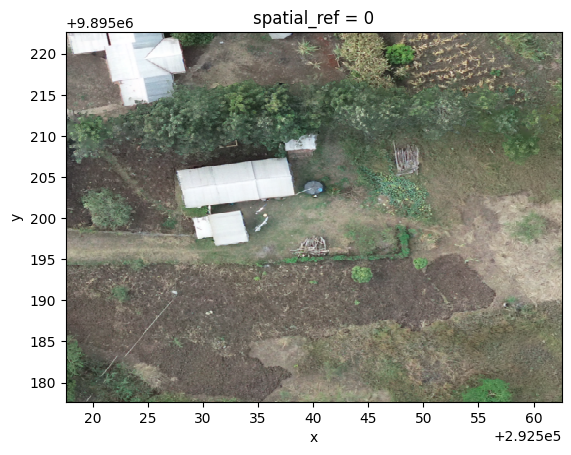

In [9]:
example_image.plot.imshow()
plt.savefig('kenol1_1867.png')

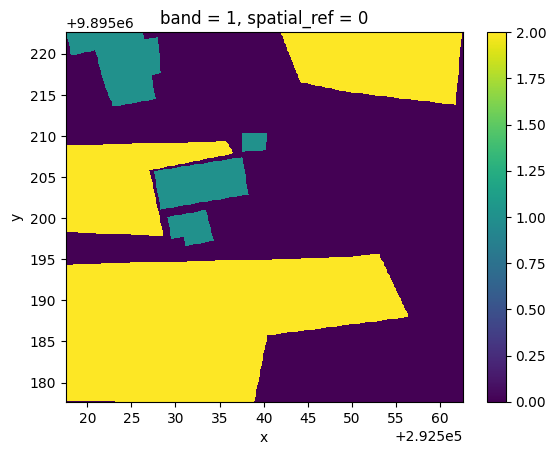

In [10]:
example_groundtruth.plot()
plt.savefig('groundtruth_kenol1_1867.png')

In [13]:
sam.generate(image, output='masks.tif', foreground=True, unique=True)
example_masks = rioxarray.open_rasterio('masks.tif')

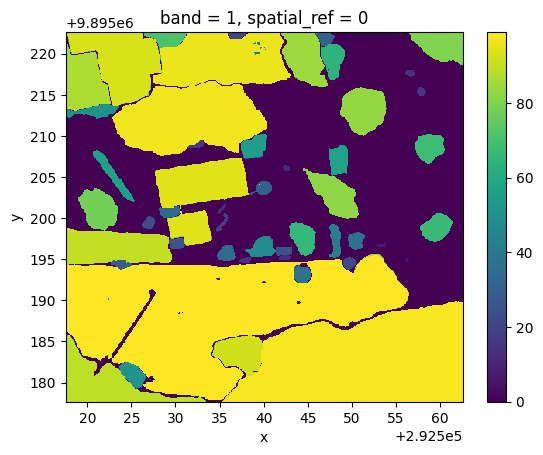

In [14]:
example_masks.plot()
plt.savefig('sam_64points_falsefor_test_kenol1_1867.png')

In [15]:
from tqdm import tqdm

In [16]:
image_directory = "/home/data/kenya/images"
sam_mask_directory = "/home/data/kenya/sam_masks"
geoTIFF_files = [f for f in os.listdir(image_directory) if f.endswith('.tif')]

In [17]:
for filename in tqdm(geoTIFF_files, desc="generating SAM masks"):
    if filename.endswith(".tif"):
        filepath = os.path.join(image_directory, filename)
        output = os.path.join(sam_mask_directory, filename)
        sam.generate(filepath, output=output, foreground=True, unique=True)

generating SAM masks: 100%|███████████████████████████████████████████████████████| 2041/2041 [2:01:19<00:00,  3.57s/it]
